In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('dark_background')

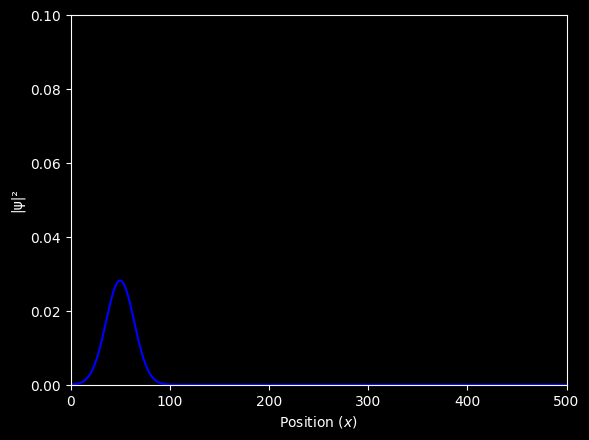

In [2]:
L=500
x0=50 
k0=0.2
sigma=20
horizon=L//2
dt=0.01
frames=100000
x=np.arange(L)
k=2*np.pi*np.fft.fftfreq(L)

psi0=np.exp(-((x-x0)**2)/(2*sigma**2))*np.exp(1j*k0*(x-x0))
a=np.sum(np.abs(psi0)**2) #normalizing factor
psi0 /= np.sqrt(a)

fig, ax=plt.subplots()
ax.set_xlim(0,L)
ax.set_ylim(0, 0.1)
ax.set_xlabel("Position $(x)$")
ax.set_ylabel("|ψ|²")
line, = ax.plot(x,np.abs(psi0)**2, color="blue")

In [3]:
psi = psi0.copy()
t_list=[] #empty list for t
x_c_list = []  #store x_c values
time_list = [] #store corresponding time values
v_eff_list = [] #effective group velocity

animate = animation.FFMpegWriter(fps=100, metadata=dict(artist='You'), bitrate=1800)
with animate.saving(fig, "Weyl_wavepacket_FFT.mp4", dpi=100):
    for frame in range(frames):
        x_c=np.sum(x*np.abs(psi)**2)/np.sum(np.abs(psi)**2) #center position x_c of the packet
        t=(2*x_c/L) #linear tilt (local tilt experienced by the packet at its current position)
        t_list.append(t)
        x_c_list.append(x_c)
        time_list.append(frame * dt)

        #1st model
        E1 = np.sin(k) - t * np.sin(k)
        #2nd model
        E2= 2*np.sin(k/2) - t*np.sin(k) 
            
        psi_k=np.fft.fft(psi)
        psi_k *= np.exp(-1j*E2*dt)
        psi = np.fft.ifft(psi_k)
        psi /= np.sqrt(np.sum(np.abs(psi)**2))

        v1=np.cos(k)-t*np.cos(k) #1st model group velocity
        v_eff1=np.sum(np.abs(psi_k)**2*v1)/np.sum(np.abs(psi_k)**2)
        v2=np.cos(k/2)-t*np.cos(k) #2nd model group velocity
        v_eff2=np.sum(np.abs(psi_k)**2*v2)/np.sum(np.abs(psi_k)**2)
        v_eff_list.append(v_eff2)
        
        line.set_data(x, np.abs(psi)**2) #updates the plot wave pacpet prob
        animate.grab_frame() #capture the updated plot as a frame for animation

plt.close(fig)

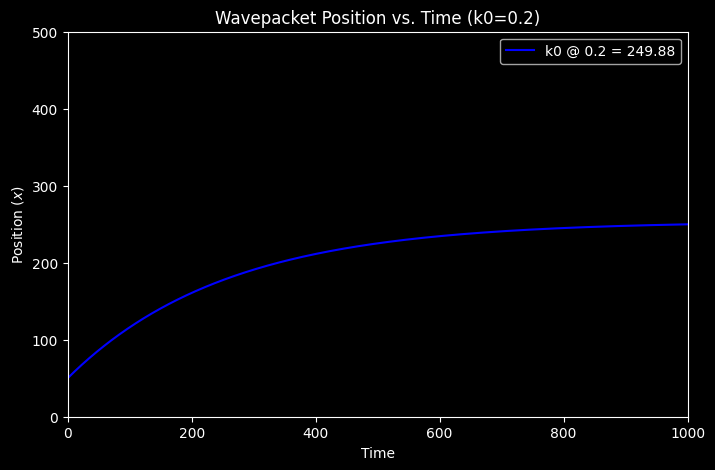

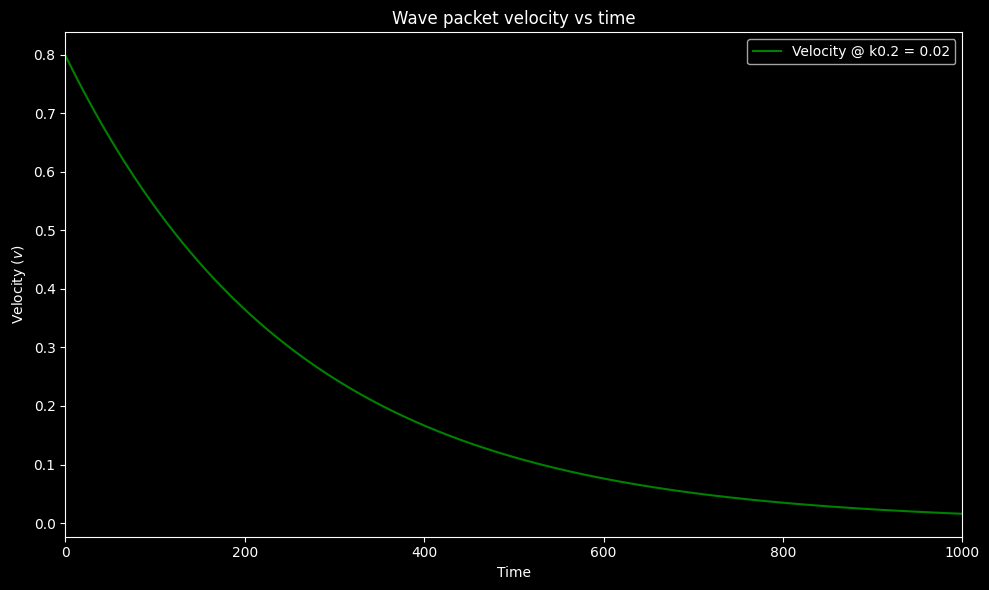

In [4]:
final_x_c = x_c_list[-1]

plt.figure(figsize=(8,5))
plt.plot(time_list, x_c_list, label=f'k0 @ {k0} = {final_x_c:.2f}', color='blue')
plt.xlabel('Time')
plt.ylabel('Position $(x)$')
plt.xlim(0,frames*dt)
plt.ylim(0,500)
plt.title(f'Wavepacket Position vs. Time (k0={k0})')
plt.legend()
plt.savefig(f"FFT_2 @k0={k0}.png", dpi=600, bbox_inches='tight')
plt.show()

final_v_eff = v_eff_list[-1]

plt.figure(figsize=(10,6))
plt.plot(time_list, v_eff_list, label=f'Velocity @ k{k0} = {final_v_eff:.2f}', color='green')
plt.xlabel('Time')
plt.ylabel('Velocity $(v)$')
plt.xlim(0,frames*dt)
plt.title('Wave packet velocity vs time')
plt.legend()
plt.tight_layout()
plt.savefig(f'Velocity_vs_time @ k{k0}.png', dpi=600, bbox_inches='tight')
plt.show()